In [1]:
%matplotlib inline

import os
import numpy as np

import miplib.ui.plots.image as showim
import miplib.data.io.read as imread
import miplib.processing.image as imops
from miplib.data.containers.image import Image

import miplib.analysis.resolution.fourier_ring_correlation as frc
from miplib.data.containers.fourier_correlation_data import FourierCorrelationDataCollection

import miplib.ui.plots.frc as frcplots
from miplib.ui.cli import miplib_entry_point_options as options

import urllib.request as dl
import miplib.data.io.read as imread

## Example to process one image input.

The image dimensions are (460, 564) and spacing [460, 564] um.
[100.0, 100.0]
The resolution of the image is 5428.187820464042.


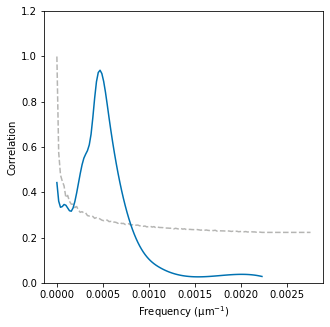

In [11]:
data_path = "D:/BMR-DS/Project_2/DataSet/HR2/brain7peak15.png"
image = imread.get_image(data_path, channel=0)
image_copy = image.copy()
spacing = image.spacing
print("The image dimensions are {} and spacing {} um.".format(image.shape, image.spacing))
image = Image(image - image.min(), [100.0, 100.0])
print(image.spacing)

frc_results = FourierCorrelationDataCollection()


frc_results[0] = frc.calculate_single_image_frc(image, args)

frcplots.plot_resolution_curves(frc_results,size = (5,5))

resolution = frc_results[0].resolution["resolution"]
print("The resolution of the image is {}.".format(resolution))

## Setup the arguments for later calculation

Setting the method to fit our data, especially for fitting curves and threshold.

1. Threshold = 1/7 (I set it 0.5, also fixed)

(To think: if we don't do fitting, can we use "one-bit sigma" method to determine the threshold, but this method also has problems to implement.)

2. Fitting option = smooth-spline (Maybe "polynomial" is more suitable for our cases.)

3. Finally, the information theory for the criteria is the best choice of our case!

In [3]:
args_list = ("None --bin-delta=1  --frc-curve-fit-type=smooth-spline "  
             " --resolution-threshold-criterion=half-bit").split()
            
args = options.get_frc_script_options(args_list)

print (args)

Namespace(carma_det_idx=0, carma_gate_idx=0, channel=0, d_angle=20, d_bin=1, d_extract_angle=5.0, debug=False, directory='None', disable_hamming=False, enhance_contrast_on_save=False, evaluate_results=False, frc_curve_fit_degree=8, frc_curve_fit_type='smooth-spline', frc_mode='one-image', hollow_iterator=False, jupyter=False, min_filter=False, pathout=None, plot_size=(2.5, 2.5), resol_square=False, resolution_point_sigma=0.01, resolution_snr_value=0.25, resolution_threshold_criterion='half-bit', resolution_threshold_curve_fit_degree=3, resolution_threshold_value=0.14285714285714285, save_plots=False, scale=100, show_image=False, show_plots=False, temp_dir=None, test_drive=False, verbose=False, working_directory='/home/sami/Data')


## Read and calculate Dataset HR1

In our dataset, there are some cases that the correlation values at all points are larger than the fixed threshold = 1/7 (e.g. brain6peak1013).

Therefore, I set threshold = 0.5 which is another most commonly used threshold.

In [9]:
frc_results = FourierCorrelationDataCollection()

resolution_hr1 = dict()

folder_path = "D:/BMR-DS/Project_2/DataSet/HR1"
file_list = os.listdir(folder_path)
for i in range(len(file_list)):
    ## Read images inside the folder:
    file_path = os.path.join(folder_path, file_list[i])
    image = imread.get_image(file_path, channel=0)
    image_copy = image.copy()
    spacing = image.spacing
    image = Image(image - image.min(), image.spacing)

    ## Calculate the resolution of each image and restore results in a dictionary
    
    file_name = file_list[i].replace('.png', '').replace('brain6peak', '')
    indx = int(file_name)
    try:
        frc_results[i] = frc.calculate_single_image_frc(image, args)
        resolution_hr1[indx] = frc_results[i].resolution["resolution"]
    except:
        #print("{} cannot be sovled".format(file_name))
        continue
#print(resolution_hr1)

d:\Anaconda\envs\miplib\lib\site-packages\pims\bioformats.py:386: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


1002 cannot be sovled
1008 cannot be sovled
1010 cannot be sovled
1012 cannot be sovled
1014 cannot be sovled
1018 cannot be sovled
102 cannot be sovled
1021 cannot be sovled
1024 cannot be sovled
1025 cannot be sovled
1027 cannot be sovled
1030 cannot be sovled
1032 cannot be sovled
1033 cannot be sovled
1034 cannot be sovled
1035 cannot be sovled
104 cannot be sovled
1041 cannot be sovled
1043 cannot be sovled
1044 cannot be sovled
1045 cannot be sovled
1046 cannot be sovled
1047 cannot be sovled
1053 cannot be sovled
1055 cannot be sovled
106 cannot be sovled
107 cannot be sovled
110 cannot be sovled
125 cannot be sovled
130 cannot be sovled
140 cannot be sovled
152 cannot be sovled
166 cannot be sovled
167 cannot be sovled
182 cannot be sovled
183 cannot be sovled
185 cannot be sovled
19 cannot be sovled
196 cannot be sovled
198 cannot be sovled
2 cannot be sovled
20 cannot be sovled
200 cannot be sovled
213 cannot be sovled
214 cannot be sovled
215 cannot be sovled
222 cannot be s

## Read and calculate Dataset HR2

In [10]:
frc_results = FourierCorrelationDataCollection()

resolution_hr2 = dict()

folder_path = "D:/BMR-DS/Project_2/DataSet/HR2"
file_list = os.listdir(folder_path)
for i in range(len(file_list)):
    ## Read images inside the folder:
    file_path = os.path.join(folder_path, file_list[i])
    image = imread.get_image(file_path, channel=0)
    image_copy = image.copy()
    spacing = image.spacing
    image = Image(image - image.min(), image.spacing)

    ## Calculate the resolution of each image and restore results in a dictionary
    file_name = file_list[i].replace('.png', '').replace('brain7peak', '')
    indx = int(file_name)
    try:
        frc_results[i] = frc.calculate_single_image_frc(image, args)
        resolution_hr2[indx] = frc_results[i].resolution["resolution"]
    except:
        print("{} cannot be sovled".format(file_name))
#print(resolution_hr2)

d:\Anaconda\envs\miplib\lib\site-packages\pims\bioformats.py:386: UserWarning: Due to an issue with JPype 0.6.0, reading is slower. Please consider upgrading JPype to 0.6.1 or later.
  warn('Due to an issue with JPype 0.6.0, reading is slower. '


10 cannot be sovled
1001 cannot be sovled
1002 cannot be sovled
1016 cannot be sovled
1025 cannot be sovled
1035 cannot be sovled
1046 cannot be sovled
1050 cannot be sovled
1055 cannot be sovled
1057 cannot be sovled
1063 cannot be sovled
1065 cannot be sovled
1069 cannot be sovled
1070 cannot be sovled
1073 cannot be sovled
1086 cannot be sovled
1091 cannot be sovled
1094 cannot be sovled
1100 cannot be sovled
1102 cannot be sovled
1110 cannot be sovled
1111 cannot be sovled
1112 cannot be sovled
1113 cannot be sovled
1120 cannot be sovled
1121 cannot be sovled
1123 cannot be sovled
113 cannot be sovled
1133 cannot be sovled
1137 cannot be sovled
1141 cannot be sovled
1147 cannot be sovled
1161 cannot be sovled
1164 cannot be sovled
1171 cannot be sovled
1179 cannot be sovled
1186 cannot be sovled
1188 cannot be sovled
1189 cannot be sovled
1190 cannot be sovled
1203 cannot be sovled
1206 cannot be sovled
1211 cannot be sovled
1225 cannot be sovled
1228 cannot be sovled
1232 cannot b

## Restore resolution into excel to compare

From the results:
1. Some resolution values are less than 0.

2. Not all the resultion exactly satisfy that image from one folder larger than the ohter.

In [ ]:
import csv
import pandas as pd

result = pd.DataFrame()
result["peak"] = resolution_hr2.keys()
result["HR2"] = resolution_hr2.values()

result_path = "D:/BMR-DS/Project_2/DataSet/hb_resolution_hr2.xls"
result.to_excel(result_path)

result = pd.DataFrame()
result["peak"] = resolution_hr1.keys()
result["HR1"] = resolution_hr1.values()

result_path = "D:/BMR-DS/Project_2/DataSet/hb_resolution_hr1.xls"
result.to_excel(result_path)

The resolution of the image is 51125.55296249924.


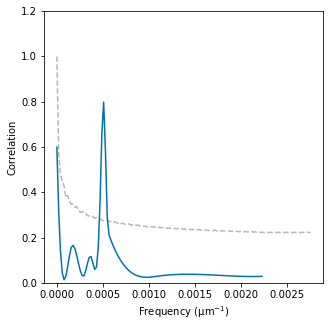

In [6]:
frc_results = FourierCorrelationDataCollection()


frc_results[0] = frc.calculate_single_image_frc(image, args)

frcplots.plot_resolution_curves(frc_results,size = (5,5))

resolution = frc_results[0].resolution["resolution"]
print("The resolution of the image is {}.".format(resolution))

Frequency: 
 [0.         0.0070922  0.0141844  0.0212766  0.02836879 0.03546099
 0.04255319 0.04964539 0.05673759 0.06382979 0.07092199 0.07801419
 0.08510638 0.09219858 0.09929078 0.10638298 0.11347517 0.12056737
 0.12765957 0.13475177 0.14184397 0.14893617 0.15602838 0.16312057
 0.17021276 0.17730497 0.18439716 0.19148937 0.19858156 0.20567375
 0.21276596 0.21985815 0.22695035 0.23404256 0.24113475 0.24822696
 0.25531915 0.26241136 0.26950353 0.27659574 0.28368795 0.29078013
 0.29787233 0.30496454 0.31205675 0.31914893 0.32624114 0.33333334
 0.34042552 0.34751773 0.35460994 0.3617021  0.36879432 0.37588653
 0.38297874 0.39007092 0.39716312 0.40425533 0.4113475  0.41843972
 0.42553192 0.4326241  0.4397163  0.44680852 0.4539007  0.4609929
 0.4680851  0.47517732 0.4822695  0.4893617  0.4964539  0.5035461
 0.5106383  0.5177305  0.5248227  0.5319149  0.53900707 0.5460993
 0.5531915  0.56028366 0.5673759  0.5744681  0.58156025 0.5886525
 0.59574467 0.6028369  0.6099291  0.61702126 0.624113

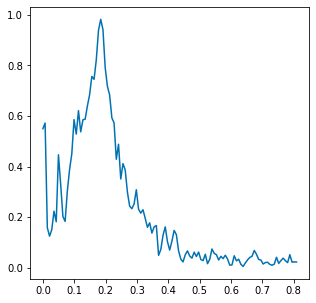

In [22]:
frc_results = FourierCorrelationDataCollection()

frc_results = frc.calculate_single_image_frc_without_fit(image, args)

X = frc_results[0].correlation["frequency"]
Y = frc_results[0].correlation["correlation"]
print("Frequency: \n {}".format(X))
print("Correlation: \n {}".format(Y))

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(X, Y)